# K-means Clustering

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans as km

In [2]:
ds=pd.read_csv("Mall_Customers.csv")
ds.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [3]:
ds.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

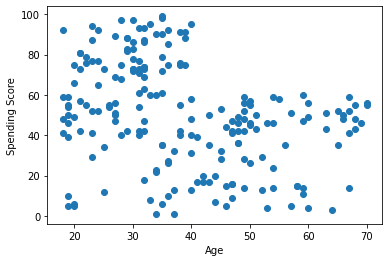

In [4]:
# Clustering users using Age and Spending Score (1-100) as features
plt.scatter(x=ds['Age'],y=ds['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [5]:
x=ds[['Age','Spending Score (1-100)']]
x.head(7)

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
5,22,76
6,35,6


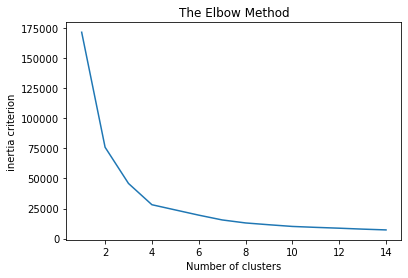

In [6]:
# To determine the value of 'k' 
# We use elbow method
res=[]
kRange = range(1,15)
for i in kRange:
    kmeans=km(n_clusters=i , max_iter=300, n_init=15, random_state=0)
    kmeans.fit(x)
    res.append(kmeans.inertia_)
plt.plot(kRange,res)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia criterion')
plt.show() 

#### Choosing 4 as the optimum k value from the elbow method

In [7]:
kmeans=km(n_clusters=4,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [8]:
yhat=kmeans.fit_predict(x)
yhat

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### Adding the predicted label/cluster to the dataset

In [9]:
new_table=ds.copy()
new_table['cluster']=yhat
new_table

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


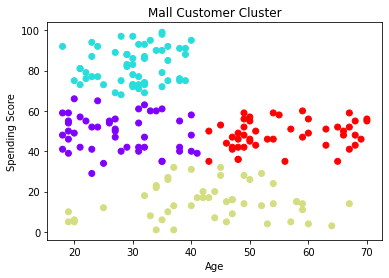

In [10]:
plt.scatter(new_table['Age'],new_table['Spending Score (1-100)'],c=new_table['cluster'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Mall Customer Cluster')
plt.show()

In [11]:
##Using Anual Income and Spending Score (1-100)
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
annual_data=ds[['Annual Income (k$)','Spending Score (1-100)']]
annual_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


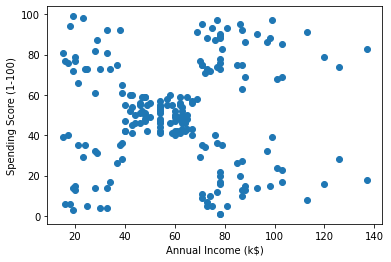

In [13]:
plt.scatter(ds['Annual Income (k$)'],ds['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
x=annual_data
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


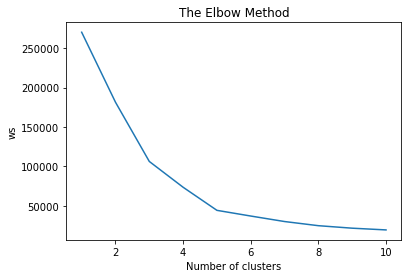

In [15]:
ws=[]
for i in range(1, 11):
    kmeans=km(n_clusters=i,init= 'k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(x)
    ws.append(kmeans.inertia_)
plt.plot(range(1, 11),ws)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('ws')
plt.show() 

In [16]:
y_kmeans=km(n_clusters=5,random_state=0)
y_kmeans.fit(x)

KMeans(n_clusters=5, random_state=0)

In [17]:
prediction=y_kmeans.fit_predict(x)
prediction

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [18]:
new_data=ds.copy()
new_data['Cluster1']=prediction
new_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


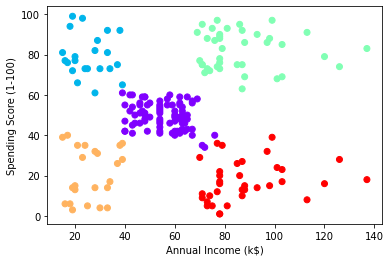

In [19]:
plt.scatter(new_data['Annual Income (k$)'],new_data['Spending Score (1-100)'],c=new_data['Cluster1'],cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()